# Test de différentes métriques pour la détermination des k plus proches voisins


## Des Ellipses aux gaussiennes

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as pat
from scipy.linalg import sqrtm
from numpy import linalg as LA

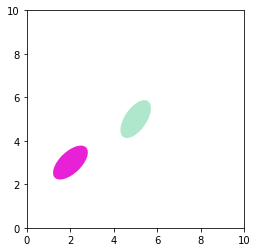

In [9]:
#Paramètre ellipse1
x1 = 2
y1 = 3
rxi1 = 1
reta1 = 2
alpha1 = np.random.rand()*360
alpha_rad1 = np.radians(alpha1)

#Paramètre ellipse2
x2 = 5
y2 = 5
rxi2 = 1
reta2 = 2
alpha2 = np.random.rand()*360
alpha_rad2 = np.radians(alpha2)


#Plot des ellipses
e1 = pat.Ellipse((x2,y2), rxi2,reta2, alpha2)
e2 = pat.Ellipse((x1,y1), rxi1,reta1, alpha1)

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.add_artist(e1)
ax.add_artist(e2)
e1.set_facecolor(np.random.rand(3))
e2.set_facecolor(np.random.rand(3))

#data = np.random.multivariate_normal(Mean, CovMatBis, 1000)
#plt.scatter(data[:,0],data[:,1])

**Définition de quelques fonctions utiles pour la suite, notamment des différentes métriques testées:**

    1. Une fonction pour trouver la gaussienne associée à l'ellipse
    2. Définition de la distance de Wasserstein pour le cas gaussien à 2 dimensions.
    3. Définition de la distance de Hellinger, distance canonique de l'espace des distributions de la famille exponentielle
    4. Définition de la divergence de Kullback-Leibleur pour le cas gaussien à 2 dimensions.

In [10]:
def ellipseToGaussian(x_center,y_center,r_xi,r_eta,alpha_rad):
    mux= x_center
    muy = y_center 
    sigma_xi = (1/6)*r_xi
    sigma_eta = (1/6)*r_eta
    
    cov = 0.5*np.tan(2*alpha_rad)*((sigma_xi**2) - (sigma_eta**2))
    CovMat = np.array([[sigma_eta**2, 0],[0, sigma_xi**2]])
    
    P = np.array([[np.cos(alpha_rad+(np.pi/2)), np.sin(alpha_rad+(np.pi/2))],[-np.sin(alpha_rad+(np.pi/2)), np.cos(alpha_rad+(np.pi/2))]])
    P_1 = np.linalg.inv(P)
    CovMatBis = np.linalg.multi_dot([P_1, CovMat, P])
    mu = np.array([mux,muy])
    
    return mu, CovMatBis


def wasserstein_metric(mu1,mu2,covMat1,covMat2):
    rC2 = sqrtm(covMat2)
    mat = covMat1 + covMat2 - (2*sqrtm(np.linalg.multi_dot([rC2, covMat1, rC2])))   
    wasserstein = np.linalg.norm(mu1-mu2)**2 + np.trace(mat)
    return wasserstein

def hellinger_metric(mu1,mu2,covMat1,covMat2):
    coef = (np.linalg.det(covMat1)**(1/4))*(np.linalg.det(covMat2)**(1/4))/(np.linalg.det(0.5*(covMat1+covMat2)))
    exp_ = np.linalg.multi_dot([np.transpose(mu1-mu2),0.5*(covMat1+covMat2),mu1-mu2])
    hellinger = 1-(coef*np.exp((-1/8)*exp_))
    return hellinger

def KL_div(mu1,mu2,covMat1,covMat2):
    prod = np.linalg.multi_dot([np.transpose(mu2-mu1),np.linalg.inv(covMat2),mu2-mu1])
    tr = np.trace(np.dot(np.linalg.inv(covMat2),covMat1))
    kl = 0.5*(tr + prod - 2 + np.log(np.linalg.det(covMat2)/np.linalg.det(covMat1)))
    return kl

**Exemple d'approche d'ellipses par des gaussiennes.**

On utilise la fonction définie au dessus et on affiche les ellipses et un échantillon de la distribution trouvée grâce à celle-ci

Wasserstein metric value: 13.002029331979315


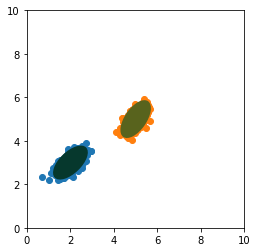

In [11]:
mean1, covMat1 = ellipseToGaussian(x1,y1,rxi1,reta1,alpha_rad1)
mean2, covMat2 = ellipseToGaussian(x2,y2,rxi2,reta2,alpha_rad2)

wasserstein = wasserstein_metric(mean1,mean2,covMat1,covMat2)

print("Wasserstein metric value: " + str(wasserstein))


e1 = pat.Ellipse((x2,y2), rxi2,reta2, alpha2)
e2 = pat.Ellipse((x1,y1), rxi1,reta1, alpha1)

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.add_artist(e1)
ax.add_artist(e2)
e1.set_facecolor(np.random.rand(3))
e2.set_facecolor(np.random.rand(3))

data1 = np.random.multivariate_normal(mean1, covMat1, 1000)
data2 = np.random.multivariate_normal(mean2, covMat2, 1000)
plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data2[:,0],data2[:,1])

## K Plus proches voisins d'un tourbillon

On simule les tourbillons par des ellipses aux paramètres aléatoires

In [12]:
num_ellipses = 10

ellipses = []
for i in range(num_ellipses):
    x_center = 7*np.random.random_sample() + 1
    y_center = 7*np.random.random_sample() + 1 
    r_xi = 2*np.random.random_sample() + 1
    r_eta = 2*np.random.random_sample() + 1
    alpha = np.random.rand()*360
    alpha_rad = np.radians(alpha)
    ellipse = np.array([x_center,y_center,r_xi,r_eta,alpha,alpha_rad])
    ellipses.append(ellipse)

**Affichage des différents tourbillons**

In [13]:
ellipses_obj = []
for ellipse in ellipses:
    ellipse_obj_ = pat.Ellipse((ellipse[0],ellipse[1]), ellipse[2],ellipse[3], ellipse[4])
    ellipses_obj.append(ellipse_obj_)


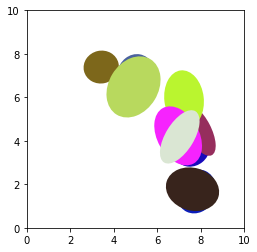

In [14]:
fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for i in range(num_ellipses):
    ax.add_artist(ellipses_obj[i])
    ellipses_obj[i].set_facecolor(np.random.rand(3))

**On trouve les différentes distributions gaussiennes associées aux différents tourbillons**

In [15]:
ellipses_g =[]

for ellipse in ellipses:
    ellipse_g = ellipseToGaussian(ellipse[0],ellipse[1],ellipse[2],ellipse[3],ellipse[5])
    ellipses_g.append(ellipse_g)


**On génère un nouveau tourbillon qui sera considéré comme l'observation autour de laquelle on souhaite trouver les k plus proches voisins**

In [9]:
x_center_obs =7*np.random.random_sample() + 1
y_center_obs =7*np.random.random_sample() + 1
r_xi_obs = 2*np.random.random_sample() + 1
r_eta_obs = 2*np.random.random_sample() + 1
alpha_obs = np.random.rand()*360
alpha_rad_obs = np.radians(alpha_obs)

e_obs = np.array([x_center_obs,y_center_obs,r_xi_obs,r_eta_obs,alpha_obs,alpha_rad_obs])
e_obs_g = ellipseToGaussian(e_obs[0],e_obs[1],e_obs[2],e_obs[3],e_obs[5])

**Calcul de chacune des distances suivant les différentes métriques entre les tourbillons et l'observation**

In [10]:
#Tester avec d'autres distance genre Hellinger, Euclidienne
distances_w = []
distances_h= []
distances_L2 = []
distances_kl = []
distances_L1 = []
for ellipse in ellipses_g:
    dis_w = wasserstein_metric(e_obs_g[0],ellipse[0],e_obs_g[1],ellipse[1])
    dis_h = hellinger_metric(e_obs_g[0], ellipse[0], e_obs_g[1],ellipse[1])
    dis_kl = KL_div(e_obs_g[0],ellipse[0], e_obs_g[1], ellipse[1])
    distances_w.append(dis_w)
    distances_h.append(dis_h)
    distances_kl.append(dis_kl)
    
for ellipse in ellipses:
    disL2 = np.linalg.norm(ellipse-e_obs)
    disL1 = np.linalg.norm(ellipse-e_obs, 1)
    distances_L2.append(disL2)
    distances_L1.append(disL1)

**On cherche les indices des k plus proches voisins pour chacune des métriques**

In [11]:
k = 3
indices_w = []
indices_h = []
indices_L2 = []
indices_kl = []
indices_L1 = []
for i in range(k):  
    indice_w = distances_w.index(min(distances_w))
    indice_h = distances_h.index(min(distances_h))
    indice_L2 = distances_L2.index(min(distances_L2))
    indice_kl = distances_kl.index(min(distances_kl))
    indice_L1 = distances_L1.index(min(distances_L1))
    indices_w.append(indice_w)
    indices_h.append(indice_h)
    indices_L2.append(indice_L2)
    indices_kl.append(indice_kl)
    indices_L1.append(indice_L1)
    distances_w[indice_w] = np.inf
    distances_h[indice_h] = np.inf
    distances_L2[indice_L2] = np.inf
    distances_kl[indice_kl] = np.inf
    distances_L1[indice_L1] = np.inf

In [12]:
print(indices_w)
print(indices_h)
print(indices_L2)
print(indices_kl)
print(indices_L1)

[3, 4, 6]
[3, 4, 2]
[2, 5, 7]
[3, 4, 6]
[2, 5, 7]


### Affichage des k plus proche voisins en fonction de la métrique choisie

**Distance de Wasserstein**

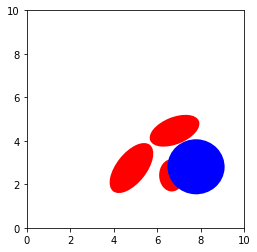

In [13]:
e_obs_o = pat.Ellipse((e_obs[0],e_obs[1]), e_obs[2],e_obs[3], e_obs[4])

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ellipses_w = []
for indice in indices_w:
    ellipse_w = pat.Ellipse((ellipses[indice][0],ellipses[indice][1]), ellipses[indice][2],ellipses[indice][3], ellipses[indice][4]) 
    ellipses_w.append(ellipse_w)
    
for ellipse in ellipses_w:
    ax.add_artist(ellipse)
    ellipse.set_facecolor([1,0,0])
    
    
ax.add_artist(e_obs_o)
e_obs_o.set_facecolor([0,0,1])

**Distance de Hellinger**

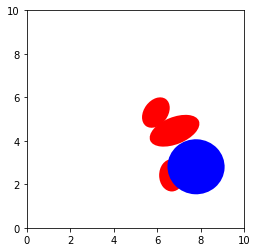

In [14]:
e_obs_o = pat.Ellipse((e_obs[0],e_obs[1]), e_obs[2],e_obs[3], e_obs[4])

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ellipses_h = []
for indice in indices_h:
    ellipse_h = pat.Ellipse((ellipses[indice][0],ellipses[indice][1]), ellipses[indice][2],ellipses[indice][3], ellipses[indice][4]) 
    ellipses_h.append(ellipse_h)
    
for ellipse in ellipses_h:
    ax.add_artist(ellipse)
    ellipse.set_facecolor([1,0,0])
    
    
ax.add_artist(e_obs_o)
e_obs_o.set_facecolor([0,0,1])

**Distance L2**

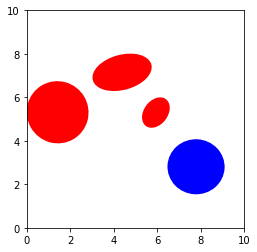

In [15]:
e_obs_o = pat.Ellipse((e_obs[0],e_obs[1]), e_obs[2],e_obs[3], e_obs[4])

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ellipses_L2 = []
for indice in indices_L2:
    ellipse_L2 = pat.Ellipse((ellipses[indice][0],ellipses[indice][1]), ellipses[indice][2],ellipses[indice][3], ellipses[indice][4]) 
    ellipses_L2.append(ellipse_L2)
    
for ellipse in ellipses_L2:
    ax.add_artist(ellipse)
    ellipse.set_facecolor([1,0,0])
    
    
ax.add_artist(e_obs_o)
e_obs_o.set_facecolor([0,0,1])

**Divergence de Kullback-Leibler**

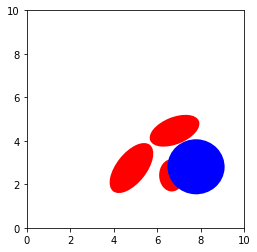

In [16]:
e_obs_o = pat.Ellipse((e_obs[0],e_obs[1]), e_obs[2],e_obs[3], e_obs[4])

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ellipses_kl = []
for indice in indices_kl:
    ellipse_kl = pat.Ellipse((ellipses[indice][0],ellipses[indice][1]), ellipses[indice][2],ellipses[indice][3], ellipses[indice][4]) 
    ellipses_kl.append(ellipse_kl)
    
for ellipse in ellipses_kl:
    ax.add_artist(ellipse)
    ellipse.set_facecolor([1,0,0])
    
    
ax.add_artist(e_obs_o)
e_obs_o.set_facecolor([0,0,1])

**Distance L1**

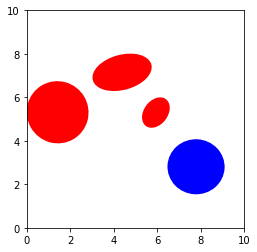

In [17]:
e_obs_o = pat.Ellipse((e_obs[0],e_obs[1]), e_obs[2],e_obs[3], e_obs[4])

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ellipses_L1 = []
for indice in indices_L1:
    ellipse_L1 = pat.Ellipse((ellipses[indice][0],ellipses[indice][1]), ellipses[indice][2],ellipses[indice][3], ellipses[indice][4]) 
    ellipses_L1.append(ellipse_L1)
    
for ellipse in ellipses_L1:
    ax.add_artist(ellipse)
    ellipse.set_facecolor([1,0,0])
    
    
ax.add_artist(e_obs_o)
e_obs_o.set_facecolor([0,0,1])

Trajectoire

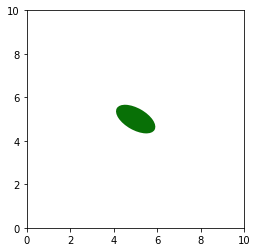

In [18]:
#Paramètre ellipse1
x1 = 2
y1 = 3
rxi1 = 1
reta1 = 2
alpha1 = np.random.rand()*360
alpha_rad1 = np.radians(alpha1)

#Paramètre ellipse2
x2 = 5
y2 = 5
rxi2 = 1
reta2 = 2
alpha2 = np.random.rand()*360
alpha_rad2 = np.radians(alpha2)


#Plot des ellipses
e1 = pat.Ellipse((x2,y2), rxi2,reta2, alpha2)

fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.add_artist(e1)
e1.set_facecolor(np.random.rand(3))

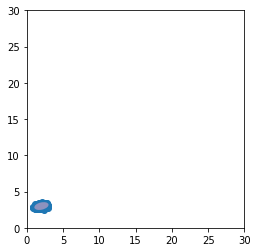

In [19]:
min_lat,max_lat = 0,30
min_lon,max_lon = 0,30

center_lat = np.mean([min_lat,max_lat])
center_lon = np.mean([min_lon,max_lon])
center = np.array([center_lon,center_lat])

x1 = 2
y1 = 3
rxi1 = 1
reta1 = 2
alpha1 = np.random.rand()*360
alpha_rad1 = np.radians(alpha1)

mean1, covMat1 = ellipseToGaussian(x1,y1,rxi1,reta1,alpha_rad1)

#e1 = pat.Ellipse((x2,y2), rxi2,reta2, alpha2)
#e2 = pat.Ellipse((x1,y1), rxi1,reta1, alpha1)
e2 = pat.Ellipse((mean1[0],mean1[1]), rxi1,reta1, alpha1)


fig = plt.figure(0)

ax = fig.add_subplot(111, aspect='equal')
ax.set_ylim(min_lat, max_lat)
ax.set_xlim(min_lon, max_lon)

ax.add_artist(e2)
e2.set_facecolor(np.random.rand(3))

data1 = np.random.multivariate_normal(mean1, covMat1, 1000)
plt.scatter(data1[:,0],data1[:,1])

In [16]:
def direction(mean,center_ref,bruit = 0.2):
    """renvoie la direction à suivre pour arriver au centre"""
    dire = center_ref-mean
    dire = dire/LA.norm(dire, axis=1)[:,np.newaxis]
    dire += np.random.randn(mean.shape[0],2) * bruit
    return dire
    
def vitesse(covMat):
    """renvoie la vitesse du tourbillon"""
    u, s, vh = np.linalg.svd(covMat)
    return s[:,0]**0.5 + s[:,1]**0.5

def converge_center(tourbillons,center,bruit = 0.2):
    """renvoie la nouvelle position du tourbillon, le tourbillon va se diriger vers center"""
    mean = tourbillons[:,:2]
    covMat = np.insert(tourbillons[:,2:], 2, tourbillons[:,3]).reshape((-1,2,2))
    dire = direction(mean,center,bruit = bruit)
    vit = vitesse(covMat)
    return np.concatenate([mean + (vit[:,np.newaxis] * dire), tourbillons[:,2:]], axis=1)

def spiral(tourbillons,bruit = 0.2,alpha = 30):
    """renvoie la nouvelle position du tourbillon, le tourbillon va faire une rotation d'alpha ou une spirale"""
    mean = tourbillons[:,:2]
    CovMat = np.insert(tourbillons[:,2:], 2, tourbillons[:,3]).reshape((-1,2,2))
    theta = np.radians(alpha)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c))).reshape((-1,2,2))
    dire = direction(mean, np.dot(R, mean.T).reshape((-1,2)),bruit=bruit)
    vit = vitesse(CovMat)
    return np.concatenate([mean + (vit[:,np.newaxis] * dire), tourbillons[:,2:]], axis=1)

def follow_gradient(tourbillon,list_mean_gauss,list_covMat_gauss,bruit = 0.2):
    mean = tourbillon[:2]
    covMat = np.insert(tourbillon[2:], 2, tourbillon[3]).reshape((-1,2,2))
    dire = sum_gradient_gauss2d(mean,list_mean_gauss,list_covMat_gauss)
    dire = dire/LA.norm(dire)
    dire += np.random.randn(2) * bruit
    vit = vitesse(covMat)

    return np.concatenate((mean + (vit * dire),tourbillon[2:]))

In [17]:
def generer_ellipses(N):
    """génère N ellipses, renvoie un array de taille Nx5"""
    x_center = 7*np.random.random_sample(N) + 1
    y_center = 7*np.random.random_sample(N) + 1 
    r_xi = np.random.lognormal(0,1/7,N)
    r_eta = np.random.lognormal(0,1/7,N)
    alpha = np.random.rand(N)*360
    alpha_rad = np.radians(alpha)
    return np.vstack([x_center, y_center, r_xi, r_eta, alpha_rad]).T

def ellipseToGaussian(x_center,y_center,r_xi,r_eta,alpha_rad):
    """ Transforme les ellipses en gaussiennes
    Prend des arrays de taille N en argument, renvoie un array de taille Nx5"""
    mux= x_center
    muy = y_center 
    sigma_xi = (1/6)*r_xi
    sigma_eta = (1/6)*r_eta
    
    CovMat = np.diag([[sigma_eta**2, 0],[0, sigma_xi**2]])
    l1 = np.vstack([sigma_xi**2, np.zeros(sigma_xi.shape[0])]).T
    l2 = np.vstack([np.zeros(sigma_eta.shape[0]), sigma_eta**2]).T
    CovMat = np.concatenate([l1, l2], axis=1).reshape((l1.shape[0], 2, 2))
    
    P = np.array([[np.cos(alpha_rad+(np.pi/2)), np.sin(alpha_rad+(np.pi/2))],[-np.sin(alpha_rad+(np.pi/2)), np.cos(alpha_rad+(np.pi/2))]]).reshape((-1,2,2))
    P_1 = np.linalg.inv(P)
    CovMatBis = P_1 @ CovMat @ P
    
    return np.vstack([mux, muy, CovMatBis[:,0,0], CovMatBis[:,0,1], CovMatBis[:,1,1]]).T

def step(tourbillons, bruit=0.2, center=None, alpha=None, model="follow gradient"):
    """Calcule le prochain état des tourbillons
    tourbillons de taille Nx5"""
    global list_mean_gauss
    global list_covMat_gauss
    if model == "spiral":
        next_tourbillons = spiral(tourbillons, bruit=bruit, alpha=alpha)
    elif model == "centre":
        next_tourbillons = converge_center(tourbillons, bruit=bruit, center=center)
    elif model == "follow gradient":
        next_tourbillons = []
        for tourbillon in tourbillons:
            next_tourbillons.append(follow_gradient(tourbillon, list_mean_gauss, list_covMat_gauss))
    return next_tourbillons

def generer_catalogue(N, bruit=0.2, center=None, alpha=None, model="follow gradient"):
    """ Le catalogue est un array de taille Nx2x10 : nb de tourbillons x (anologues,successeurs) x nb de paramètres
    renvoie un catalogue de taille Nx2x10"""
    catalogue = np.empty((N,2,10))
    ellipses = generer_ellipses(N)
    gaussians = ellipseToGaussian(ellipses[:,0], ellipses[:,1], ellipses[:,2], ellipses[:,3], ellipses[:,4]) # taille Nx5
    next_gaussians = step(gaussians, bruit=bruit, center=center, alpha=alpha, model=model)
    next2_gaussians = step(next_gaussians, bruit=bruit, center=center, alpha=alpha, model=model)
    catalogue[:,0,:5] = gaussians
    catalogue[:,0,5:] = next_gaussians
    catalogue[:,1,:5] = next_gaussians
    catalogue[:,1,5:] = next2_gaussians
    return catalogue

In [18]:
def plot_tourbillon(tourbillon):
    # returns a matplotlib patch
    # tourbillon de taille 5
    mean = tourbillon[:2]
    C = np.insert(tourbillon[2:], 2, tourbillon[3]).reshape((2,2))
    u, s, vh = np.linalg.svd(C)
    theta = np.sign(C[1,0]) * np.arccos(np.trace(C)/2)
    a = pat.Ellipse(xy=mean, width=6*s[0]**0.5, height=6*s[1]**0.5, angle=theta*180/np.pi)
    return a

In [19]:
from numpy.linalg import det
from numpy.linalg import inv
def gaus2d(pos,mean, covMat):
    """calcule la valeur de la gaussienne à un point pos"""
    return 1. / (2. * np.pi * np.sqrt(det(covMat))) * np.exp(-0.5 * np.dot(np.dot((pos-mean).T,inv(covMat)),pos-mean))

def sum_gaus2d(pos,list_mean,list_covMat):
    """renvoie la valeur pour l'ensemble des gaussiennes à un point pos"""
    res = 0
    for i in range(len(list_mean)):
        if(i%2==0):
            res += gaus2d(pos,list_mean[i],list_covMat[i])
        else:
            res -= gaus2d(pos,list_mean[i],list_covMat[i])
    return res

def gradient_gauss2d(pos,mean,covMat):
    """calcule le gradient de la gaussienne à un point pos"""
    return np.dot(inv(covMat),pos-mean)*gaus2d(pos,mean,covMat)

def sum_gradient_gauss2d(pos,list_mean,list_covMat):
    """calcule la somme des gradient pour l'ensemble des gaussiennes à un point pos"""
    dire = np.array([0.0,0.0])
    for i in range(len(list_mean)):
        if(i%2==0):
            dire += gradient_gauss2d(pos,list_mean[i],list_covMat[i])
        else:
            dire -= gradient_gauss2d(pos,list_mean[i],list_covMat[i])
    dire = np.array([-dire[1],dire[0]])
    return dire

In [20]:
def playground():
    list_mean = []
    list_covMat = []
    while len(list_mean)<6:
        mean = np.random.randint(2.5,7.5, size=2)
        line_cov = np.random.randint(-10,10, size=3)
        covMat = np.array([[line_cov[0],line_cov[1]],[line_cov[1],line_cov[2]]])
        if(det(covMat)>0 and line_cov[0]>0):
            list_mean.append(mean)
            list_covMat.append(covMat)

    precision = 100
    X = np.linspace(0, 10, precision)
    Y = np.linspace(0, 10 , precision)
    Z = np.empty((precision,precision))
    for i in range(len(X)):
        for j in range(len(Y)):
            pos = np.array([X[i],Y[j]])
            Z[i][j] = sum_gaus2d(pos,list_mean,list_covMat)
    return list_mean, list_covMat, X, Y, Z


## Générer le catalogue

In [21]:
list_mean_gauss, list_covMat_gauss, X, Y, Z = playground()

Text(0.5, 1.0, 'Simplest default with labels')

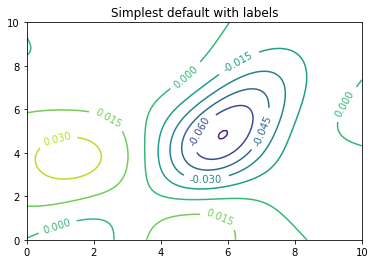

In [22]:
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

In [199]:
np.savez('playground_file', list_mean_gauss=list_mean_gauss, list_covMat_gauss=list_covMat_gauss, X=X,Y=Y,Z=Z)

In [31]:
#_ = playground_file.seek(0) # Only needed here to simulate closing & reopening file
npzfile = np.load("playground_file.npz")
list_mean_gauss = npzfile['list_mean_gauss']
list_covMat_gauss = npzfile['list_covMat_gauss']
X = npzfile['X']
Y = npzfile['Y']
Z = npzfile['Z']

C:\Users\lucas\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


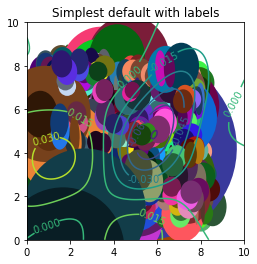

In [23]:
N = 1000
catalogue = generer_catalogue(N, alpha=30, model="follow gradient")

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)
colors = np.random.rand(N,3)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')
for i in range(N):
    tourbillon1 = plot_tourbillon(catalogue[i,0,:5])
    tourbillon2 = plot_tourbillon(catalogue[i,0,5:])
    ax.add_artist(tourbillon1)
    ax.add_artist(tourbillon2)
    color = colors[i]
    tourbillon1.set_facecolor(color)
    tourbillon2.set_facecolor(color*0.5)

In [32]:
# save numpy array as csv file

with open('catalogue.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(catalogue.shape))
    for data_slice in catalogue:
        np.savetxt(outfile, data_slice, fmt='%-7.2f')
        outfile.write('# New slice\n')
        

        

In [38]:
new_data = np.loadtxt('catalogue.txt')
print(new_data.shape)
new_data = new_data.reshape((1000,2,10))

(2000, 10)


In [30]:
#Observations

catalogue_obs = generer_catalogue(30, alpha=30, model="follow gradient")

In [31]:
catalogue_obs[0,0,:2]

array([4.50918927, 5.73067229])

## Calcul des k plus proches trajectoires

In [41]:
ellipse_obs_t_1 = catalogue_obs[0,0,:5]
ellipse_obs_t = catalogue_obs[0,0,5:]

mean_obs_t_1 = ellipse_obs_t_1[:2]
mean_obs_t = ellipse_obs_t[:2]
covMatobsT_1 = np.insert(ellipse_obs_t_1[2:], 2, ellipse_obs_t_1[3]).reshape((2,2))
covMatobsT = np.insert(ellipse_obs_t[2:], 2, ellipse_obs_t[3]).reshape((2,2))

distances_wt = []
for i in range(10):
    ellipse_t_1 = catalogue[i,0,:5]
    ellipse_t = catalogue[i,0,5:]
    mean_t_1 = ellipse_t_1[:2]
    covMatT_1 = np.insert(ellipse_t_1[2:], 2, ellipse_t_1[3]).reshape((2,2))
    mean_t = ellipse_t[:2]
    covMatT = np.insert(ellipse_t[2:], 2, ellipse_t[3]).reshape((2,2))
    distance_wt = wasserstein_metric(mean_obs_t_1,mean_t_1,covMatobsT_1,covMatT_1) + wasserstein_metric(mean_obs_t,mean_t,covMatobsT,covMatT)
    distances_wt.append(distance_wt)

In [42]:
k=6
indices_wt=[]
distances_wt2 = np.array(distances_wt[:])
for i in range(k):
    indice_wt = distances_wt.index(min(distances_wt))
    indices_wt.append(indice_wt)
    distances_wt[indice_wt] = np.inf


In [43]:
print(indices_wt)

[3, 2, 0, 1, 4, 8]


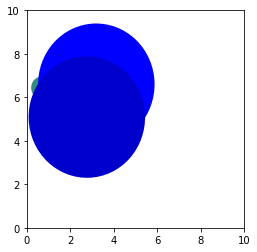

In [44]:
#plot


fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)


for i in indices_wt:
    tourbillont_1 =plot_tourbillon(catalogue[i,0,:5])
    tourbillont =plot_tourbillon(catalogue[i,0,5:])
    #tourbillont2 =plot_tourbillon(catalogue[i,1,5:])
    ax.add_artist(tourbillont_1)
    ax.add_artist(tourbillont)
    #ax.add_artist(tourbillont2)
    tourbillont_1.set_facecolor(colors[i])
    tourbillont.set_facecolor(colors[i]*0.8)
    #tourbillont2.set_facecolor(color*0.2)
    
tourbillon_obs_t_1 = plot_tourbillon(ellipse_obs_t_1)
tourbillon_obs_t = plot_tourbillon(ellipse_obs_t)
#tourbillon_obs_t2 = plot_tourbillon(catalogue_obs[0,1,5:])

ax.add_artist(tourbillon_obs_t_1)
ax.add_artist(tourbillon_obs_t)
#ax.add_artist(tourbillon_obs_t2)
tourbillon_obs_t_1.set_facecolor([0,0,1])
tourbillon_obs_t.set_facecolor([0,0,0.8])
#tourbillon_obs_t2.set_facecolor([0,0,0.2])

## Test des opérateurs

### Calcul des poids

In [24]:
def wasserstein_vect(u,v):
    """u,v de taille Nx5"""
    mean_u = u[:,:2]
    cov_u = np.insert(u[:,2:], 2, u[:,3]).reshape((-1,2,2))
    mean_v = v[:,:2]
    cov_v = np.insert(v[:,2:], 2, v[:,3]).reshape((-1,2,2))
    
    return np.array([wasserstein_metric(mean_u[i,:],mean_v[i,:],cov_u[i,:],cov_v[i,:]) for i in range(mean_u.shape[0])])

def new_wasserstein(u, v):
    """u,v de taille Nx10"""
    return wasserstein_vect(u[:,:5], v[:,:5]) + wasserstein_vect(u[:,5:], v[:,5:])

def gaussian_kernel(u, v, l=1.):
    return np.exp(-np.square(new_wasserstein(u, v))/l**2)

def compute_weights(x, neighbors, **args):
    kernels = gaussian_kernel(np.repeat(x[np.newaxis,...], neighbors.shape[0], axis=0), neighbors, **args)
    return kernels / np.sum(kernels)

#neighbors = catalogue[indices_wt,0,:]
#successors = catalogue[indices_wt,1,:]
#x = catalogue_obs[0,0,:]
#l = np.median(distances_wt2[indices_wt])
#kernels = np.exp(-np.square(distances_wt2[indices_wt])/l**2)
#weights = kernels / np.sum(kernels)
#weights

In [25]:
def locally_constant_mean(x, neighbors, successors, weights):
    return np.sum(successors * weights.reshape((-1,1)), axis=0)

def locally_incremental_mean(x, neighbors, successors, weights):
    return x + np.sum((successors - neighbors) * weights.reshape((-1,1)), axis=0)

def locally_linear_mean(x, neighbors, successors, weights):
    W = np.diag(weights)
    X = neighbors
    Y = successors
    X_mean = np.sum(X*weights.reshape((-1,1)), axis=0)
    Y_mean = np.sum(Y*weights.reshape((-1,1)), axis=0)
    X_centered = X - X_mean
    Y_centered = Y - Y_mean
    cov_X = X_centered.T @ W @ X_centered
    cov_X_inv = np.linalg.pinv(cov_X, rcond=0.01)
    cov_YX = Y_centered.T @ W @ X_centered
    return Y_mean + cov_YX @ cov_X_inv @ (x - X_mean)

### Comparaison des opérateurs

In [26]:
preds = [fn(x, neighbors, successors, weights) for fn in [locally_constant_mean, locally_incremental_mean, locally_linear_mean]]
methods = ["locally constant mean", "locally incremental mean", "locally linear mean"]
tourbillons_suivant = [plot_tourbillon(pred[5:]) for pred in preds]

fig, axs = plt.subplots(1,3,figsize=(20,10))

for j in range(3):
    axs[j].set_aspect('equal')
    axs[j].set_ylim(0, 6)
    axs[j].set_xlim(2, 8)
    axs[j].set_title(methods[j])

    for i in indices_wt:
        tourbillont_1 =plot_tourbillon(catalogue[i,0,:5])
        tourbillont =plot_tourbillon(catalogue[i,0,5:])
        tourbillont2 =plot_tourbillon(catalogue[i,1,5:])
        axs[j].add_artist(tourbillont_1)
        axs[j].add_artist(tourbillont)
        axs[j].add_artist(tourbillont2)
        tourbillont_1.set_facecolor(colors[i])
        tourbillont.set_facecolor(colors[i]*0.6)
        tourbillont2.set_facecolor(colors[i]*0.6**2)
    
    tourbillon_obs_t_1 = plot_tourbillon(ellipse_obs_t_1)
    tourbillon_obs_t = plot_tourbillon(ellipse_obs_t)
    
    axs[j].add_artist(tourbillon_obs_t_1)
    axs[j].add_artist(tourbillon_obs_t)
    axs[j].add_artist(tourbillons_suivant[j])
    tourbillon_obs_t_1.set_facecolor([0,0,1])
    tourbillon_obs_t.set_facecolor([0,0,0.8])
    tourbillons_suivant[j].set_facecolor([1,0,0])

NameError: name 'x' is not defined

In [27]:
#Calcul des k prédictions

def predictions(nb_predictions, catalogue, catalogue_obs, method, num_tourbillon):
    tourbillons_suivant=[]
    position_tourbillons_suivant=[]
    current_obs = catalogue_obs[num_tourbillon,0,:]

    for k in range(nb_predictions):
        ellipse_obs_t_1 = current_obs[:5]
        ellipse_obs_t = current_obs[5:]

        mean_obs_t_1 = ellipse_obs_t_1[:2]
        mean_obs_t = ellipse_obs_t[:2]
        covMatobsT_1 = np.insert(ellipse_obs_t_1[2:], 2, ellipse_obs_t_1[3]).reshape((2,2))
        covMatobsT = np.insert(ellipse_obs_t[2:], 2, ellipse_obs_t[3]).reshape((2,2))

        distances_wt = []
        for i in range(200):
            ellipse_t_1 = catalogue[i,0,:5]
            ellipse_t = catalogue[i,0,5:]
            mean_t_1 = ellipse_t_1[:2]
            covMatT_1 = np.insert(ellipse_t_1[2:], 2, ellipse_t_1[3]).reshape((2,2))
            mean_t = ellipse_t[:2]
            covMatT = np.insert(ellipse_t[2:], 2, ellipse_t[3]).reshape((2,2))
            distance_wt = wasserstein_metric(mean_obs_t_1,mean_t_1,covMatobsT_1,covMatT_1) + wasserstein_metric(mean_obs_t,mean_t,covMatobsT,covMatT)
            distances_wt.append(distance_wt)
        k=50
        indices_wt=[]
        distances_wt2 = np.array(distances_wt[:])

        for i in range(k):
            indice_wt = distances_wt.index(min(distances_wt))
            indices_wt.append(indice_wt)
            distances_wt[indice_wt] = np.inf

        neighbors = catalogue[indices_wt,0,:]
        successors = catalogue[indices_wt,1,:]
        x = current_obs
        l = np.median(distances_wt2[indices_wt])
        kernels = np.exp(-np.square(distances_wt2[indices_wt])/l**2)
        weights = kernels / np.sum(kernels)


        pred = method(x, neighbors, successors, weights)
        tourbillons_suivant.append(plot_tourbillon(pred[5:]))
        position_tourbillons_suivant.append(pred[5:][:2])
        current_obs = np.concatenate((current_obs[5:],pred[5:]))
    return tourbillons_suivant, position_tourbillons_suivant

In [28]:
nb_predictions = 3

In [34]:
tourbillons_suivant, position_tourbillons_suivant = predictions(nb_predictions,catalogue_obs,locally_constant_mean,10)

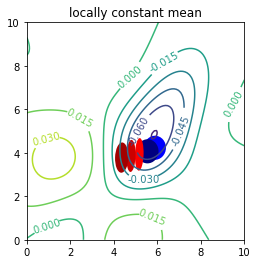

In [35]:
fig = plt.figure(0)
ax1 = fig.add_subplot(111, aspect='equal')
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 10)
ax1.set_title("locally constant mean")

CS = ax1.contour(X, Y, Z)
ax1.clabel(CS, inline=1, fontsize=10)
tourbillon_obs_t_1 = plot_tourbillon(catalogue_obs[10,0,:5])
tourbillon_obs_t = plot_tourbillon(catalogue_obs[10,0,5:])
ax1.add_artist(tourbillon_obs_t_1)
ax1.add_artist(tourbillon_obs_t)
tourbillon_obs_t_1.set_facecolor([0,0,1])
tourbillon_obs_t.set_facecolor([0,0,0.5])
color = [1,0,0]
for pred in tourbillons_suivant:
    ax1.add_artist(pred)
    pred.set_facecolor(color)
    color = [color[0]*0.8,0,0]

In [70]:
tourbillons_suivant_lim, position_tourbillons_suivant_lim = predictions(nb_predictions,catalogue_obs,locally_incremental_mean,10)

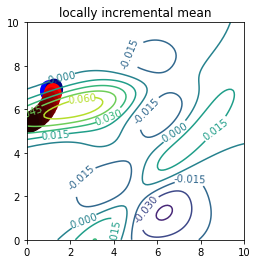

In [71]:
fig = plt.figure(0)
ax2 = fig.add_subplot(111, aspect='equal')
ax2.set_ylim(0, 10)
ax2.set_xlim(0, 10)
ax2.set_title("locally incremental mean")

CS = ax2.contour(X, Y, Z)
ax2.clabel(CS, inline=1, fontsize=10)
tourbillon_obs_t_1 = plot_tourbillon(catalogue_obs[10,0,:5])
tourbillon_obs_t = plot_tourbillon(catalogue_obs[10,0,5:])
ax2.add_artist(tourbillon_obs_t_1)
ax2.add_artist(tourbillon_obs_t)
tourbillon_obs_t_1.set_facecolor([0,0,1])
tourbillon_obs_t.set_facecolor([0,0,0.5])
color = [1,0,0]
for pred in tourbillons_suivant_lim:
    ax2.add_artist(pred)
    pred.set_facecolor(color)
    color = [color[0]*0.8,0,0]

In [68]:
tourbillons_suivant_llm, position_tourbillons_suivant_llm = predictions(nb_predictions,catalogue_obs,locally_linear_mean,10)

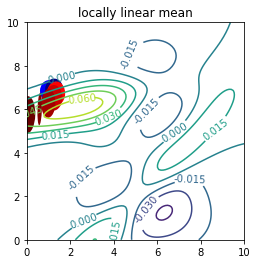

In [69]:
fig = plt.figure(0)
ax3 = fig.add_subplot(111, aspect='equal')
ax3.set_ylim(0, 10)
ax3.set_xlim(0, 10)
ax3.set_title("locally linear mean")

CS = ax3.contour(X, Y, Z)
ax3.clabel(CS, inline=1, fontsize=10)
tourbillon_obs_t_1 = plot_tourbillon(catalogue_obs[10,0,:5])
tourbillon_obs_t = plot_tourbillon(catalogue_obs[10,0,5:])
ax3.add_artist(tourbillon_obs_t_1)
ax3.add_artist(tourbillon_obs_t)
tourbillon_obs_t_1.set_facecolor([0,0,1])
tourbillon_obs_t.set_facecolor([0,0,0.5])
color = [1,0,0]
for pred in tourbillons_suivant_llm:
    ax3.add_artist(pred)
    pred.set_facecolor(color)
    color = [color[0]*0.8,0,0]

# Calcul du RMSE et des matrices de prédiction

In [52]:
nb_predictions = 10

In [53]:
from sklearn.metrics import mean_squared_error

def list_prediction(nb_predictions, catalogue_obs, method):
    """construit une matrice de taille nombre d'ellipses x nb_predictions x 2 (coordonnées en x et y)
    cette matrice représente les valeurs prédites"""
    mat_prediction = np.empty((catalogue_obs.shape[0],nb_predictions,2))
    for i in range(catalogue_obs.shape[0]):
        _, position_tourbillons_suivant = predictions(nb_predictions, catalogue_obs, method, i)
        for j in range(nb_predictions):
            mat_prediction[i][j] = np.array(position_tourbillons_suivant[j])
    return mat_prediction

def list_true_value(nb_predictions,catalogue_obs,bruit=0.2,center=None,alpha=None,model="follow gradient"):
    """construit une matrice de taille nombre d'ellipses x nb_predictions x 2 (coordonnées en x et y)
    cette matrice représente les valeurs réelles si les tourbillons suivent le modèle prédéfini"""
    mat_true = np.empty((catalogue_obs.shape[0],nb_predictions,2))
    next_gaussians = catalogue_obs[:,0,5:]
    for j in range(nb_predictions):        
        next_gaussians = step(next_gaussians, bruit=bruit, center=center, alpha=alpha, model=model)
        for i in range(catalogue_obs.shape[0]):
            mat_true[i][j] = np.array(next_gaussians[i][:2])
    return mat_true

def AnDA_RMSE(a,b):
    """ Compute the Root Mean Square Error between 2 n-dimensional vectors. """
    return np.sqrt(np.mean((a-b)**2))

In [54]:
mat_prediction = list_prediction(nb_predictions, catalogue_obs, locally_constant_mean)

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [55]:
mat_true = list_true_value(nb_predictions,catalogue_obs,bruit=0.2,center=None,alpha=None,model="follow gradient")

In [60]:
mat_true

array([[[ 5.98047073e+00,  5.37225244e+00],
        [ 5.72861139e+00,  5.19099745e+00],
        [ 5.46885882e+00,  5.12404666e+00],
        [ 5.14784451e+00,  5.08541583e+00],
        [ 4.87110265e+00,  5.09205577e+00],
        [ 4.53024968e+00,  5.08483301e+00],
        [ 4.17562728e+00,  5.27539816e+00],
        [ 4.44064631e+00,  5.58988558e+00],
        [ 4.62797985e+00,  5.88018985e+00],
        [ 4.71857227e+00,  6.13780102e+00]],

       [[ 4.16817132e+00,  9.00209789e-01],
        [ 4.02366279e+00,  6.10521444e-01],
        [ 4.05488557e+00,  4.04187159e-01],
        [ 4.05736215e+00,  1.52872689e-01],
        [ 4.11591633e+00, -1.79298757e-01],
        [ 3.87343616e+00, -4.60171204e-01],
        [ 3.91910475e+00, -8.70998577e-01],
        [ 3.66336326e+00, -1.07576658e+00],
        [ 3.40005378e+00, -1.40584559e+00],
        [ 3.12712552e+00, -1.66271564e+00]],

       [[ 2.31198166e+00,  4.41329295e+00],
        [ 2.49811934e+00,  4.63711347e+00],
        [ 2.70413728e+00,  4

En vert ce sont les vraies valeurs et en bleu ce sont les prédictions

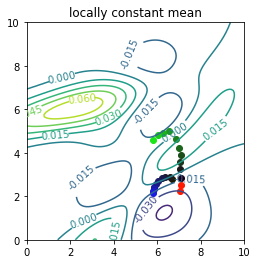

In [58]:
index = 5 #numéro du tourbillon
fig = plt.figure(0)
ax1 = fig.add_subplot(111, aspect='equal')
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 10)
ax1.set_title("locally constant mean")

CS = ax1.contour(X, Y, Z)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.scatter(catalogue_obs[index,0,:5][0],catalogue_obs[index,0,:5][1],c=np.array([1,0.1,0]).reshape(1,-1))
ax1.scatter(catalogue_obs[index,0,5:][0],catalogue_obs[index,0,5:][1],c=np.array([1,0.1,0.]).reshape(1,-1))
pred = mat_prediction[index]
true = mat_true[index]
i = 0
for mean in pred:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,0.1,i/len(pred)]).reshape(1,-1))
    i+=1
i = 0
for mean in true:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,i/len(pred),0.1]).reshape(1,-1))
    i+=1

Pour calculer le RMSE selon le temps t+5 $\times$ dt (calcul du RMSE selon toutes les ellipses et leur prédiction)

In [60]:
AnDA_RMSE(mat_true[:,5,:],mat_prediction[:,5,:])

1.8318911432241858

In [61]:
mat_prediction = list_prediction(nb_predictions, catalogue_obs, locally_incremental_mean)
AnDA_RMSE(mat_true[:,5,:],mat_prediction[:,5,:])

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


1.6157088711578482

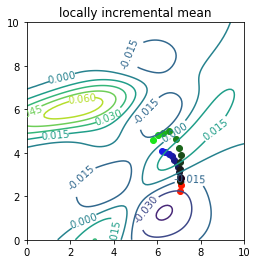

In [62]:
index = 5 #numéro du tourbillon
fig = plt.figure(0)
ax1 = fig.add_subplot(111, aspect='equal')
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 10)
ax1.set_title("locally incremental mean")

CS = ax1.contour(X, Y, Z)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.scatter(catalogue_obs[index,0,:5][0],catalogue_obs[index,0,:5][1],c=np.array([1,0.1,0]).reshape(1,-1))
ax1.scatter(catalogue_obs[index,0,5:][0],catalogue_obs[index,0,5:][1],c=np.array([1,0.1,0.]).reshape(1,-1))
pred = mat_prediction[index]
true = mat_true[index]
i = 0
for mean in pred:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,0.1,i/len(pred)]).reshape(1,-1))
    i+=1
i = 0
for mean in true:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,i/len(pred),0.1]).reshape(1,-1))
    i+=1

In [63]:
mat_prediction = list_prediction(nb_predictions, catalogue_obs, locally_linear_mean)
AnDA_RMSE(mat_true[:,5,:],mat_prediction[:,5,:])

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


1.9573732313335217

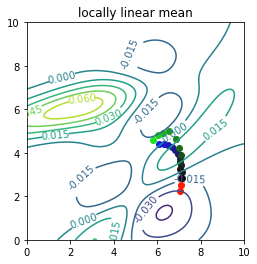

In [64]:
index = 5 #numéro du tourbillon
fig = plt.figure(0)
ax1 = fig.add_subplot(111, aspect='equal')
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 10)
ax1.set_title("locally linear mean")

CS = ax1.contour(X, Y, Z)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.scatter(catalogue_obs[index,0,:5][0],catalogue_obs[index,0,:5][1],c=np.array([1,0.1,0]).reshape(1,-1))
ax1.scatter(catalogue_obs[index,0,5:][0],catalogue_obs[index,0,5:][1],c=np.array([1,0.1,0.]).reshape(1,-1))
pred = mat_prediction[index]
true = mat_true[index]
i = 0
for mean in pred:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,0.1,i/len(pred)]).reshape(1,-1))
    i+=1
i = 0
for mean in true:
    ax1.scatter(mean[0],mean[1],c = np.array([0.1,i/len(pred),0.1]).reshape(1,-1))
    i+=1

In [65]:
RMSE_epoch = []
for i in range(mat_true.shape[1]):
    RMSE_epoch.append(AnDA_RMSE(mat_true[:,i,:],mat_prediction[:,i,:]))

Text(0.5, 0, 'Temps')

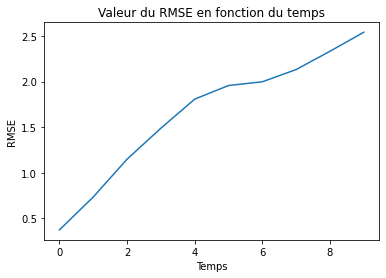

In [66]:
plt.plot(RMSE_epoch)
plt.title('Valeur du RMSE en fonction du temps')
plt.ylabel('RMSE')
plt.xlabel('Temps')

Pour calculer le RMSE selon un seul tourbillon (le 5 dans l'exemple)

In [67]:
AnDA_RMSE(mat_true[5,:,:],mat_prediction[5,:,:])

0.2825557685580004